In [1]:
import pandas as pd 
import numpy as np      
import matplotlib.pyplot as plt

In [2]:
def normalization(df, var):

    xmin = df[var].min()
    xmax = df[var].max()

    norm = df[var].apply(lambda x: (x-xmin)/(xmax - xmin))
    return norm

In [ ]:
folder = r"data\adaptation"

## Education Level

In [ ]:
df = pd.read_csv(rf"{folder}\education_level.csv")

province_map = {
    'Aceh': 'Aceh',
    'Sumatera Utara': 'Sumatera Utara',
    'Sumatera Barat': 'Sumatera Barat',
    'Riau': 'Riau',
    'Kepulauan Riau': 'Kepulauan Riau',
    'Jambi': 'Jambi',
    'Sumatera Selatan': 'Sumatera Selatan',
    'Bangka Belitung': 'Bangka Belitung',
    'Bengkulu': 'Bengkulu',
    'Lampung': 'Lampung',
    'DKI Jakarta': 'DKI Jakarta',
    'Jawa Barat': 'Jawa Barat',
    'Banten': 'Banten',
    'Jawa Tengah': 'Jawa Tengah',
    'DI Yogyakarta': 'DI Yogyakarta',
    'Jawa Timur': 'Jawa Timur',
    'Bali': 'Bali',
    'Nusa Tenggara Barat': 'Nusa Tenggara Barat',
    'Nusa Tenggara Timur': 'Nusa Tenggara Timur',
    'Kalimantan Barat': 'Kalimantan Barat',
    'Kalimantan Tengah': 'Kalimantan Tengah',
    'Kalimantan Selatan': 'Kalimantan Selatan',
    'Kalimantan Timur': 'Kalimantan Timur',
    'Kalimantan Utara': 'Kalimantan Utara',
    'Sulawesi Utara': 'Sulawesi Utara',
    'Gorontalo': 'Gorontalo',
    'Sulawesi Tengah': 'Sulawesi Tengah',
    'Sulawesi Barat': 'Sulawesi Barat',
    'Sulawesi Selatan': 'Sulawesi Selatan',
    'Sulawesi Tenggara': 'Sulawesi Tenggara',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku Utara',
    'Papua Barat Daya': 'Papua Barat',
    'Papua Barat': 'Papua Barat',
    'Papua Selatan': 'Papua',
    'Papua Tengah': 'Papua',
    'Papua Pegunungan': 'Papua',
    'Papua': 'Papua',
}

df['Provinsi'] = df['Provinsi'].map(province_map)

In [ ]:
df = df.groupby('Provinsi')[[col for col in df if col != 'Provinsi']].sum().reset_index()

num_cols = [col for col in df if col != 'Provinsi']
df.loc[df['Provinsi']=='Papua', num_cols] = df.loc[df['Provinsi']=='Papua', num_cols]/4
df.loc[df['Provinsi']=='Papua Barat', num_cols] = df.loc[df['Provinsi']=='Papua Barat', num_cols]/2

df['Higher Education Level'] = df['Perguruan Tinggi'] + df['SMA']

df = df.rename(columns={'Provinsi':'Province', 'Tidak/Belum Sekolah':'No Schooling', 'Tidak Tamat SD':'Elementary Incomplete', 
                        'SD':'Elementary', 'SMP':'Junior High School', 'SMA':'Senior High School', 'Perguruan Tinggi':'University'})

In [ ]:
A8 = df.copy()
A8['A8'] = normalization(df, 'Higher Education Level')
A8.to_csv(r'data\processed\A4_HigherEducationLevel.csv', index=False)

## Farmers Group

In [ ]:
df = pd.read_csv(rf'{folder}\number_of_farmers.csv')
df = df[['Provinsi', '2023_Total']]
df = df.rename(columns={'Provinsi':'Province', '2023_Total': 'Farmers'})

In [93]:
province_map = {
    'Aceh': 'Aceh',
    'Sumatera Utara': 'Sumatera Utara',
    'Sumatera Barat': 'Sumatera Barat',
    'Riau': 'Riau',
    'Kepulauan Riau': 'Kepulauan Riau',
    'Jambi': 'Jambi',
    'Sumatera Selatan': 'Sumatera Selatan',
    'Kepulauan Bangka Belitung': 'Bangka Belitung',
    'Bengkulu': 'Bengkulu',
    'Lampung': 'Lampung',
    'DKI Jakarta': 'DKI Jakarta',
    'Jawa Barat': 'Jawa Barat',
    'Banten': 'Banten',
    'Jawa Tengah': 'Jawa Tengah',
    'DI Yogyakarta': 'DI Yogyakarta',
    'Jawa Timur': 'Jawa Timur',
    'Bali': 'Bali',
    'Nusa Tenggara Barat': 'Nusa Tenggara Barat',
    'Nusa Tenggara Timur': 'Nusa Tenggara Timur',
    'Kalimantan Barat': 'Kalimantan Barat',
    'Kalimantan Tengah': 'Kalimantan Tengah',
    'Kalimantan Selatan': 'Kalimantan Selatan',
    'Kalimantan Timur': 'Kalimantan Timur',
    'Kalimantan Utara': 'Kalimantan Utara',
    'Sulawesi Utara': 'Sulawesi Utara',
    'Gorontalo': 'Gorontalo',
    'Sulawesi Tengah': 'Sulawesi Tengah',
    'Sulawesi Barat': 'Sulawesi Barat',
    'Sulawesi Selatan': 'Sulawesi Selatan',
    'Sulawesi Tenggara': 'Sulawesi Tenggara',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku Utara',
    'Papua Barat Daya': 'Papua Barat',
    'Papua Barat': 'Papua Barat',
    'Papua Selatan': 'Papua',
    'Papua Tengah': 'Papua',
    'Papua Pegunungan': 'Papua',
    'Papua': 'Papua',
}

In [94]:
df1 = pd.read_csv(rf'{folder}\Kelompok Tani.csv')
df1 = df1[['Provinsi', 'Jumlah Kelompok Tani 2023', 'Jumlah Gabungan Kelompok Tani 2023']]

In [95]:
df1 = df1.rename(columns={'Provinsi':'Province',
                          'Jumlah Kelompok Tani 2023': 'Farmers Group', 
                          'Jumlah Gabungan Kelompok Tani 2023': 'Farmers Association'})

In [96]:
df1['Province'] = df1['Province'].apply(lambda x: province_map[x] 
                                        if x in province_map.keys() else x)

In [97]:
df1 = df1.groupby('Province').sum().reset_index()

In [98]:
# df1['A1'] = normalization(df1, 'Farmers Group')

In [99]:
A1 = pd.merge(df1, df, on='Province')

In [100]:
A1['Groups per 1000 Farmers'] = A1['Farmers Group'] / A1['Farmers'] *1000
A1['Association per 1000 Farmers'] = A1['Farmers Association'] / A1['Farmers'] *1000
A1['A1'] = normalization(A1, 'Groups per 1000 Farmers')

In [ ]:
A1.to_csv(r'data\processed\A1_FarmersGroup.csv', index=False)

## Extension Officer

In [ ]:
df2 = pd.read_csv(rf'{folder}\extension_officer.csv')

In [103]:
df2 = df2.drop(columns=['No'])

In [104]:
df2 = df2.rename(columns={'Provinsi':'Province',
                          'PNS': 'Civil Servant',
                          'PPPK':'Contract Worker',
                          'Swasta':'Private',
                          'Swadaya':'Self-employed',
                          'TBPP':'Contract Worker (TBPP)',
                          'APBD':'Contract Worker (APBD)'})

In [105]:
df2['Province'] = df2['Province'].apply(lambda x: province_map[x] 
                                        if x in province_map.keys() else x)

In [106]:
df2 = df2.groupby(['Province']).sum().reset_index()

In [108]:
A2 = pd.merge(df2, df, on='Province')

In [110]:
A2['Officers per 1000 Farmers'] = A2['Total'] / A2['Farmers'] * 1000

In [111]:
A2['A2'] = normalization(A2, 'Officers per 1000 Farmers')

In [ ]:
A2.to_csv(r'data\processed\A2_ExtensionOfficers.csv', index=False)

## Millennial Farmers

In [ ]:
df3 = pd.read_csv(rf'{folder}\millenial_farmer.csv')

In [114]:
df3 = df3.rename(columns={'Provinsi':'Province',
                          'Jumlah Petani': 'Total Farmers',
                          'Pakai Teknologi (<19)':'Under 19',
                          'Pakai Teknologi (19<x<39)':'Between 19 and 39',
                          'Pakai Teknologi (>39)':'Over 39',
                          'Tidak Pakai (19<x<39)':'Not Using (19<x<39)'})

In [115]:
df3['Province'] = df3['Province'].apply(lambda x: province_map[x] 
                                        if x in province_map.keys() else x)

df3 = df3.groupby('Province').sum().reset_index()

In [116]:


df3['Use Technology (%)'] = (df3['Under 19'] + df3['Between 19 and 39'] + df3['Over 39']) / df3['Total Farmers'] * 100

df3['A3'] = normalization(df3, 'Use Technology (%)')

In [117]:
A3 = df3.copy()

In [ ]:
A3.to_csv(r'data\processed\A3_MillenialFarmers.csv', index=False)

## Urban Farming

In [ ]:
pop = pd.read_csv(rf'{folder}\population_2024.csv')

In [ ]:
df4 = pd.read_csv(rf'{folder}\urban_farming.csv')

In [121]:
df4['Province'] = df4['Province'].apply(lambda x: province_map[x]
                                        if x in province_map.keys() else x)

df4 = df4.groupby('Province').sum().reset_index()

In [122]:
df4['Urban Farming'] = df4['RUTP (Household)'] + df4['Individual (Unit)']

In [123]:
A4 = pd.merge(df4, pop, left_on='Province', right_on='Province')

In [124]:
A4['Population'] = A4['Population (in thousands)'] * 1000

In [125]:
A4['Urban Farming per Capita'] = A4['Urban Farming'] / A4['Population'] * 1000
    
A4['A4'] = normalization(A4, 'Urban Farming per Capita')

In [ ]:
A4.to_csv(r'data\processed\A4_UrbanFarming.csv', index=False)

## Irrigation

In [ ]:
folder = r"data\exposure"

# area = pd.read_csv(fr'{folder}\agriculture_area\total_area_and_number_of_island.csv')
# area = area.rename(columns={'Provinsi':'Province', 'Luas Wilayah (Km2)':'Total Area (km2)'})
# area = area.drop(columns=['Ibu Kota Wilayah', 'Persentase Terhadap Luas Wilayah', 'Jumlah Pulau'])

# agriculture land data
# dry_fields = pd.read_csv(fr'{folder}\agriculture_area\dry_fields.csv')
# garden_fields = pd.read_csv(fr'{folder}\agriculture_area\garden_fields.csv')
# unused_land = pd.read_csv(fr'{folder}\agriculture_area\unused_lands.csv')
wetlands = pd.read_csv(fr'{folder}\agriculture_area\wetlands.csv')
wetlands_non_irr = pd.read_csv(fr'{folder}\agriculture_area\wetlands_non-irrigated.csv')
wetlands_irr = pd.read_csv(fr'{folder}\agriculture_area\wetlands_irrigated.csv')

# Standardize the column
columns_ag_area = ['Provinsi', '2015', '2016', '2017', '2018', '2019']

# dry_fields = dry_fields[columns_ag_area]
# garden_fields = garden_fields[columns_ag_area]
# unused_land = unused_land[columns_ag_area]
wetlands = wetlands[columns_ag_area]
wetlands_irr = wetlands_irr[columns_ag_area]
wetlands_non_irr = wetlands_non_irr[columns_ag_area]

wetlands = wetlands.rename(columns={'Provinsi':'Province'})
wetlands_irr = wetlands_irr.rename(columns={'Provinsi':'Province'})
wetlands_irr['Province'] = wetlands_irr['Province'].str.replace('	', '')
# change the province name 
wetlands_irr['Province'] = wetlands_irr['Province'].apply(lambda x: 'Bangka Belitung' 
                                                          if x == 'Kepulauan Bangka Belitung'
                                                          else x)
wetlands_non_irr = wetlands_non_irr.rename(columns={'Provinsi':'Province'})
# dry_fields.loc[:, 'Type'] = 'Dry Fields'
# garden_fields.loc[:, 'Type'] = 'Garden Fields'
# unused_land.loc[:, 'Type'] = 'Unused'
# wetlands.loc[:, 'Type'] = 'Wetlands'
# wetlands_irr.loc[:, 'Type'] = 'Irrigated Wetlands'
# wetlands_non_irr.loc[:, 'Type'] = 'Non-Irrigated Wetlands'

In [128]:
A5 = pd.merge(wetlands[['Province', '2017']], wetlands_irr[['Province', '2017']], on='Province', suffixes=['_wetlands', '_irrigated'])

In [129]:
A5['Irrigated Wetlands'] = A5['2017_irrigated'] / A5['2017_wetlands'] * 100

A5['A5'] = normalization(A5, 'Irrigated Wetlands')

In [ ]:
folder = r"C:\Users\binta\Downloads\Agroclimate\AdaptiveCapacity"
A5.to_csv(r'data\processed\A5_IrrigatedWetlands.csv', index=False)

## Financial Systems

In [131]:
folder = r"C:\Users\binta\Downloads\Agroclimate\AdaptiveCapacity"
df6 = pd.read_excel(rf'{folder}\SistemKeuanganDesa.xlsx')

In [132]:
df6['Province'] = df6['Province'].apply(lambda x: province_map[x]
                                        if x in province_map.keys() else x)
df6 = df6.groupby('Province').sum().reset_index()

In [133]:
df6['Available (%)'] = (df6['Available and Updated'] + df6['Available and Not Updated']) / df6['Total'] * 100

In [134]:
df6['A6'] = normalization(df6, 'Available (%)')

In [135]:
A6 = df6.copy()

In [ ]:
A6.to_csv(r'data\processed\A6_FinancialSystem.csv', index=False)

## Income Diversification

In [137]:
folder2 = r"C:\Users\binta\Downloads\Agroclimate\Sensitivity"

In [138]:
df7 = pd.read_excel(fr'{folder2}\AgricultureJob\Banyaknya Desa Yang Sebagian Penduduknya Bekerja di Pertanian.xlsx')
total_villages = pd.read_excel(fr'{folder2}\AgricultureJob\Jumlah Desa.xlsx')

In [139]:
total_villages = total_villages.rename(columns={'Provinsi':'Province','Jumlah Desa':'Total Villages'})

In [140]:
A7 = pd.merge(left=total_villages, right=df7, on='Province')

In [141]:
province_map = {
    'Aceh': 'Aceh',
    'Sumatera Utara': 'Sumatera Utara',
    'Sumatera Barat': 'Sumatera Barat',
    'Riau': 'Riau',
    'Kepulauan Riau': 'Kepulauan Riau',
    'Jambi': 'Jambi',
    'Sumatera Selatan': 'Sumatera Selatan',
    'Kepulauan Bangka Belitung': 'Bangka Belitung',
    'Bengkulu': 'Bengkulu',
    'Lampung': 'Lampung',
    'DKI Jakarta': 'DKI Jakarta',
    'Jawa Barat': 'Jawa Barat',
    'Banten': 'Banten',
    'Jawa Tengah': 'Jawa Tengah',
    'DI Yogyakarta': 'DI Yogyakarta',
    'Jawa Timur': 'Jawa Timur',
    'Bali': 'Bali',
    'Nusa Tenggara Barat': 'Nusa Tenggara Barat',
    'Nusa Tenggara Timur': 'Nusa Tenggara Timur',
    'Kalimantan Barat': 'Kalimantan Barat',
    'Kalimantan Tengah': 'Kalimantan Tengah',
    'Kalimantan Selatan': 'Kalimantan Selatan',
    'Kalimantan Timur': 'Kalimantan Timur',
    'Kalimantan Utara': 'Kalimantan Utara',
    'Sulawesi Utara': 'Sulawesi Utara',
    'Gorontalo': 'Gorontalo',
    'Sulawesi Tengah': 'Sulawesi Tengah',
    'Sulawesi Barat': 'Sulawesi Barat',
    'Sulawesi Selatan': 'Sulawesi Selatan',
    'Sulawesi Tenggara': 'Sulawesi Tenggara',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku Utara',
    'Papua Barat Daya': 'Papua Barat',
    'Papua Barat': 'Papua Barat',
    'Papua Selatan': 'Papua',
    'Papua Tengah': 'Papua',
    'Papua Pegunungan': 'Papua',
    'Papua': 'Papua',
}


region_map = {
    'Aceh': 'Sumatera',
    'Sumatera Utara': 'Sumatera',
    'Sumatera Barat': 'Sumatera',
    'Riau': 'Sumatera',
    'Kepulauan Riau': 'Sumatera',
    'Jambi': 'Sumatera',
    'Sumatera Selatan': 'Sumatera',
    'Bangka Belitung':'Sumatera',
    'Bengkulu': 'Sumatera',
    'Lampung': 'Sumatera',
    'DKI Jakarta':'Jawa',
    'Jawa Barat': 'Jawa',
    'Banten': 'Jawa',
    'Jawa Tengah': 'Jawa',
    'DI Yogyakarta': 'Jawa',
    'Jawa Timur': 'Jawa',
    'Bali': 'Bali-Nusa Tenggara',
    'Nusa Tenggara Barat': 'Bali-Nusa Tenggara',
    'Nusa Tenggara Timur': 'Bali-Nusa Tenggara',
    'Kalimantan Barat': 'Kalimantan',
    'Kalimantan Tengah': 'Kalimantan',
    'Kalimantan Selatan': 'Kalimantan',
    'Kalimantan Timur': 'Kalimantan',
    'Kalimantan Utara': 'Kalimantan',
    'Sulawesi Utara': 'Sulawesi',
    'Gorontalo': 'Sulawesi',
    'Sulawesi Tengah': 'Sulawesi',
    'Sulawesi Barat': 'Sulawesi',
    'Sulawesi Selatan': 'Sulawesi',
    'Sulawesi Tenggara': 'Sulawesi',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku',
    'Papua Barat': 'Papua',
    'Papua': 'Papua',
}

In [142]:
A7['Province'] = A7['Province'].apply(lambda x: province_map[x] 
                                            if x in province_map.keys()
                                            else x)
A7 = A7.groupby(['Province']).sum().reset_index()
A7.loc[:, 'Independent of Agriculture (%)'] = (100 - A7['Total'] / A7['Total Villages'] * 100)

In [143]:
A7['A7'] = normalization(A7, 'Independent of Agriculture (%)')

In [ ]:
A7.to_csv(r'data\processed\A7_IncomeDiversification.csv', index=False)

## Statistics

In [152]:
AC = A1[['Province', 'A1']]\
        .merge(A2[['Province', 'A2']], on='Province')\
        .merge(A3[['Province', 'A3']], on='Province')\
        .merge(A4[['Province', 'A4']], on='Province')\
        .merge(A5[['Province', 'A5']], on='Province')\
        .merge(A6[['Province', 'A6']], on='Province')\
        .merge(A7[['Province', 'A7']], on='Province')\
        .merge(A8[['Province', 'A8']], on='Province')                                                                            

In [153]:
AC['AC'] = AC[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']].mean(axis=1)
AC['AC'] = normalization(AC, 'AC')

In [154]:
region_map = {
    'Aceh': 'Sumatera',
    'Sumatera Utara': 'Sumatera',
    'Sumatera Barat': 'Sumatera',
    'Riau': 'Sumatera',
    'Kepulauan Riau': 'Sumatera',
    'Jambi': 'Sumatera',
    'Sumatera Selatan': 'Sumatera',
    'Bangka Belitung':'Sumatera',
    'Bengkulu': 'Sumatera',
    'Lampung': 'Sumatera',
    'DKI Jakarta':'Jawa',
    'Jawa Barat': 'Jawa',
    'Banten': 'Jawa',
    'Jawa Tengah': 'Jawa',
    'DI Yogyakarta': 'Jawa',
    'Jawa Timur': 'Jawa',
    'Bali': 'Bali-Nusa Tenggara',
    'Nusa Tenggara Barat': 'Bali-Nusa Tenggara',
    'Nusa Tenggara Timur': 'Bali-Nusa Tenggara',
    'Kalimantan Barat': 'Kalimantan',
    'Kalimantan Tengah': 'Kalimantan',
    'Kalimantan Selatan': 'Kalimantan',
    'Kalimantan Timur': 'Kalimantan',
    'Kalimantan Utara': 'Kalimantan',
    'Sulawesi Utara': 'Sulawesi',
    'Gorontalo': 'Sulawesi',
    'Sulawesi Tengah': 'Sulawesi',
    'Sulawesi Barat': 'Sulawesi',
    'Sulawesi Selatan': 'Sulawesi',
    'Sulawesi Tenggara': 'Sulawesi',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku',
    'Papua Barat': 'Papua',
    'Papua': 'Papua',
}



region_colors = {
    'Sumatera':'tab:orange',
    'Jawa':'tab:blue',
    'Kalimantan':'tab:green',
    'Sulawesi':'tab:red',
    'Bali-Nusa Tenggara':'tab:brown',
    'Maluku':'tab:cyan',
    'Papua':'tab:olive'
}

In [155]:
AC = AC.sort_values(by='AC', ascending=True).reset_index(drop=True)

AC['Region'] = AC['Province'].apply(lambda x: region_map[x]
                                    if x in region_map.keys() else x)
AC['Color'] = AC['Region'].apply(lambda x: region_colors[x]
                                 if x in region_colors.keys() else 'k')

In [57]:
# fig, ax = plt.subplots(figsize=(16,10), nrows=2, ncols=4, dpi=200, constrained_layout=True, 
#                        sharey=True)
# ax = ax.flatten()

# ax[0].scatter(AC['AC'], AC['Province'], c=AC['Color'])
# ax[0].set_title('Adaptive Capacity by Province', fontweight='bold')

# ax[1].barh(AC['Province'], AC['A1'], color=AC['Color'])

# plt.show()

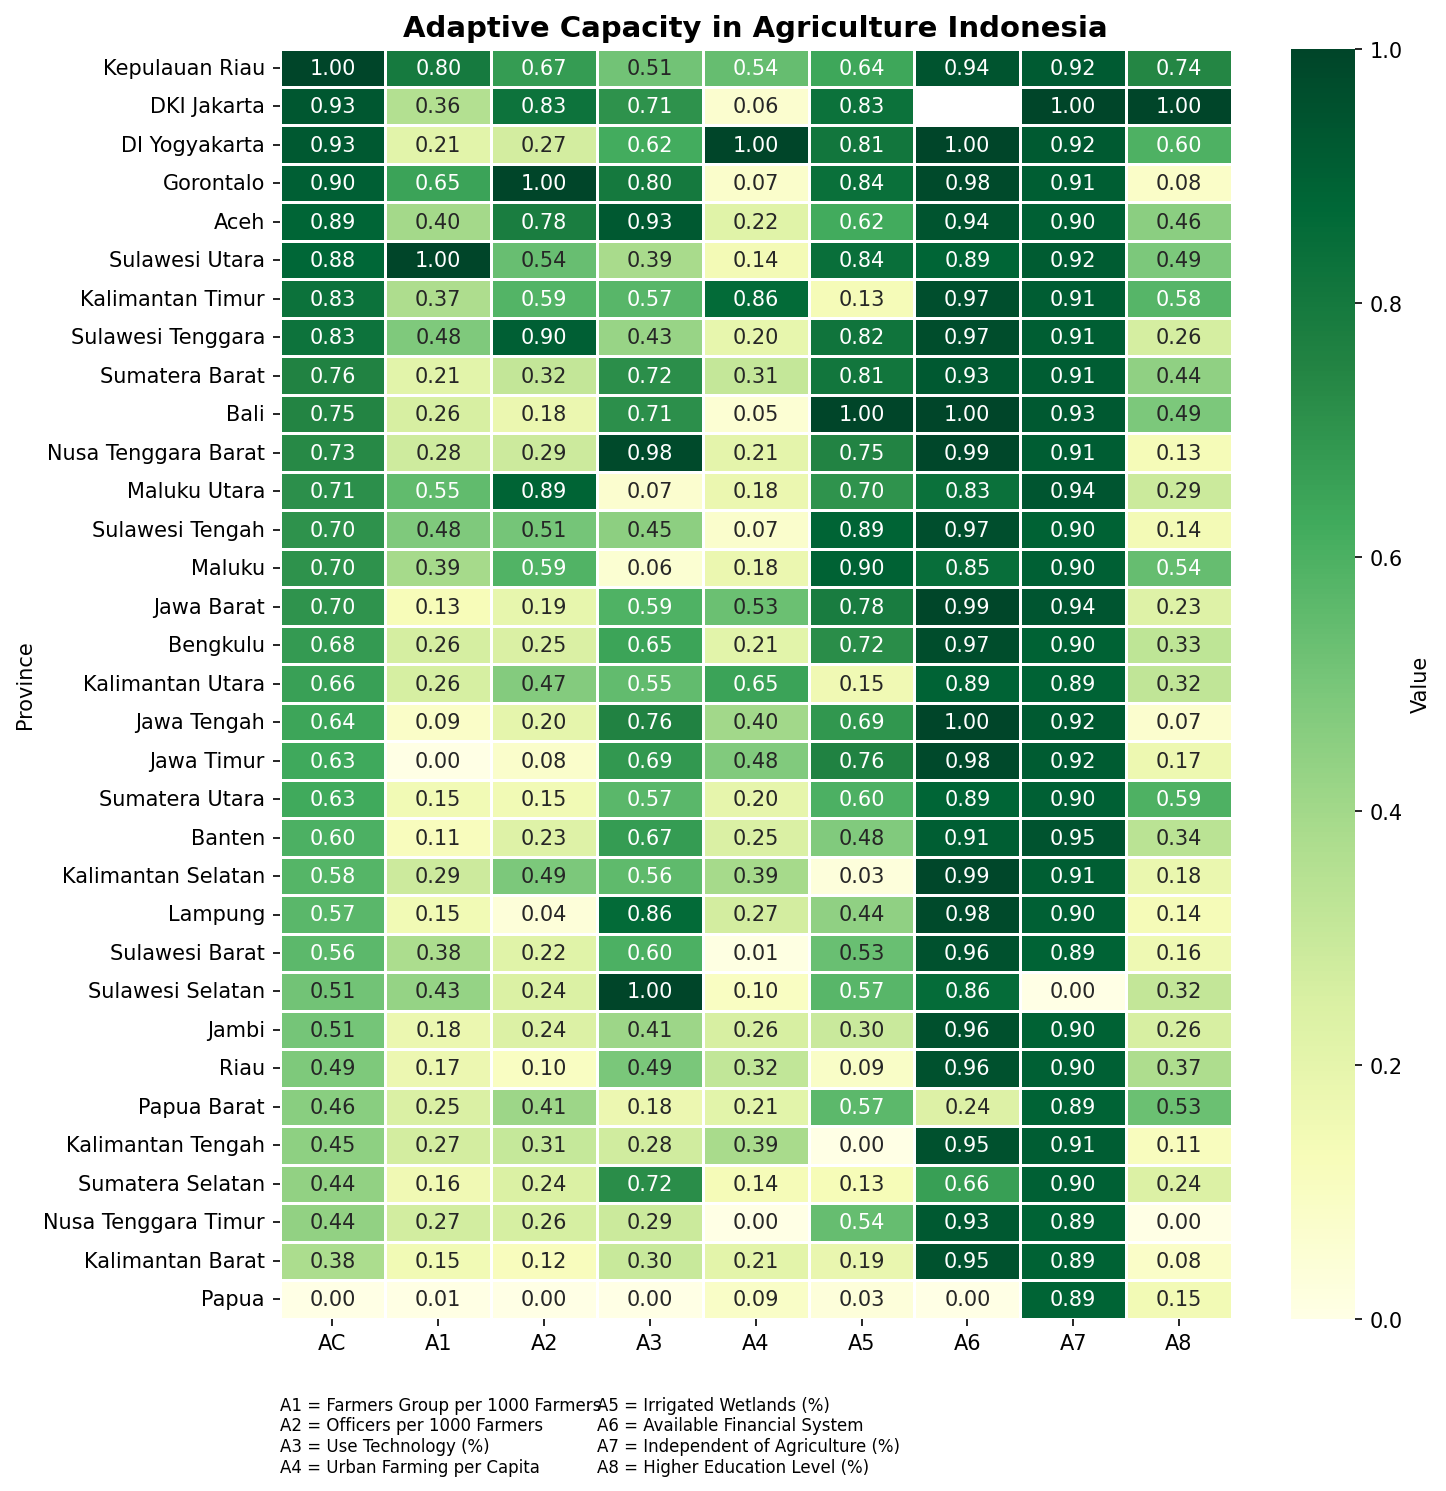

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
df_heatmap = AC[['Province', 'AC', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']]
df_heatmap = df_heatmap.sort_values(by='AC', ascending=False).set_index('Province')

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 10), dpi=150)
sns.heatmap(df_heatmap, 
            cmap="YlGn",          # colormap
            annot=True,           # show numbers in cells
            fmt=".2f",            # formatting for numbers
            linewidths=0.5,       # <-- space between cells
            linecolor="white",    # <-- color of the space
            cbar_kws={'label': 'Value'})  

ax.set_title("Adaptive Capacity in Agriculture Indonesia", fontsize=14, fontweight='bold')

xlabels = ['AC', 'Farmers Group per 1000 Farmers', 'Officers per 1000 Farmers',
           'Use Technology (%)', 'Urban Farming per Capita', 'Irrigated Wetlands (%)',
           'Available Financial System (%)', 'Independent of Agriculture (%)']

# add information on x-axis below the heatmap
# Left column
ax.text(0.0, 35,
        "A1 = Farmers Group per 1000 Farmers\n"
        "A2 = Officers per 1000 Farmers\n"
        "A3 = Use Technology (%)\n"
        "A4 = Urban Farming per Capita",
        ha='left', va='top', fontsize=8,
        transform=ax.transData)

# Right column
ax.text(3, 35,   # adjust x offset to control spacing between columns
        "A5 = Irrigated Wetlands (%)\n"
        "A6 = Available Financial System\n"
        "A7 = Independent of Agriculture (%)\n"
        "A8 = Higher Education Level (%)",
        ha='left', va='top', fontsize=8,
        transform=ax.transData)


fig.tight_layout()
fig.savefig("result\AdaptiveCapacity.png", dpi=300, bbox_inches='tight')
plt.show()

In [161]:
limits = AC['AC'].quantile([0.2, 0.4, 0.6, 0.8])

In [162]:
AC['Level'] = AC['AC'].apply(lambda x: 'Very Low' if x <= limits[0.2] else 
                            'Low' if x <= limits[0.4] else 
                            'Medium' if x <= limits[0.6] else 
                            'High' if x <= limits[0.8] else 
                            'Very High')

In [ ]:
AC.to_csv(rf'data\processed\4.AdaptiveCapacity.csv', index=False)

In [166]:
region_mean = AC[['Region', 'AC']].groupby(['Region']).mean().reset_index()

In [167]:
region_std = AC[['Region', 'AC']].groupby(['Region']).std().reset_index()

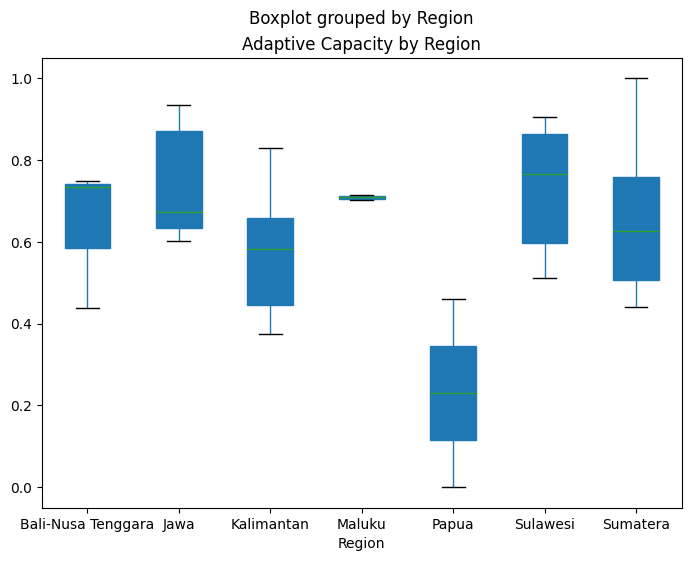

In [168]:
fig, ax = plt.subplots(figsize=(8,6))
bp = AC.boxplot(column='AC', by='Region', grid=False, ax=ax, patch_artist=True, showfliers=True)
ax.set_title('Adaptive Capacity by Region')
plt.show()